In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
from scipy.integrate import cumtrapz

In [14]:
#Best current prediction: RFR, degraded feats, 3 week lag, fixed seasons

sj1 = [  9,  10,  11,  11,   9,  10,   8,  11,  11,  10,  11,  18,  36,
        38,  31,  62,  93,  76,  85,  54,  39,  38,  58,  48,  55,  44,
        43,  45,  37,  26,  24,  20,  24,  30,  23,  20,  26,  29,  33,
        29,  19,  16,  17,  15,  15,  11,   8,  10,   7,  10,  11,  10,
        11,   8,   8,   9,  12,   8,  10,  11,  15,  18,  22,  23,  33,
        33,  35,  71,  66,  54,  51,  47,  54,  47,  39,  50,  62,  70,
        68,  50,  52,  45,  48,  33,  41,  43,  42,  57,  39,  38,  35,
        26,  18,  30,  44,  63,  55,  33,  17,  17,  13,   9,   9,  13,
        15,  10,  20,  29,  27,  34,  33,  36,  50,  48,  44,  35,  33,
        95,  72, 120, 115, 132, 105,  88,  64,  46,  60,  68,  68,  52,
        49,  45,  46,  31,  32,  28,  27,  39,  33,  33,  26,  33,  25,
        19,  22,  24,  28,  22,  17,  19,  13,  12,  20,  18,  10,  11,
        12,  16,  13,  20,  26,  29,  29,  36,  27,  19,  29,  27,  31,
        73,  72,  92,  61,  71,  42,  33,  37,  31,  36,  50,  59,  50,
        41,  47,  49,  39,  46,  46,  29,  30,  19,  18,  26,  25,  19,
        22,  22,  20,  22,  23,  17,  25,  15,  12,  15,  18,  15,  15,
        13,   7,  12,  18,  13,  15,  35,  38,  28,  23,  18,  21,  24,
        29,  33,  36,  36,  37,  46,  65,  67,  48,  62,  44,  48,  40,
        56,  48,  50,  47,  43,  34,  35,  33,  33,  29,  20,  17,  20,
        19,  14,  11,  13,  18,  19,  11,  12,  13,  16,  20,  14,  13]
iq1 = [ 4,  3,  3,  2,  3,  2,  2,  3,  3,  3,  4,  2,  3,  4,  5, 10,  9,
        9,  8,  9, 11, 10,  8,  8,  7,  7,  6,  6,  6,  5,  5,  8, 10, 11,
       10, 10, 10, 11, 10,  8,  7, 10,  8,  6,  6,  5,  4,  4,  3,  2,  2,
        2,  2,  2,  2,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  6,  7,  7,
        8,  8,  8,  9,  8,  8,  9,  9, 12,  9,  8,  8,  7,  8, 10,  7,  8,
        7,  6,  5,  7,  6,  8,  8,  7,  8,  7,  6,  5,  3,  4,  3,  3,  3,
        2,  2,  2,  3,  3,  3,  2,  3,  2,  2,  2,  2,  2,  2,  4,  4,  7,
        7,  6,  9, 12, 11, 12, 10, 10, 11,  8,  7,  9,  9, 11,  9, 10,  9,
       10, 13, 12, 11, 11,  8,  7,  9,  6,  6,  7,  8,  7,  5,  4,  3,  3,
        2,  3,  3]

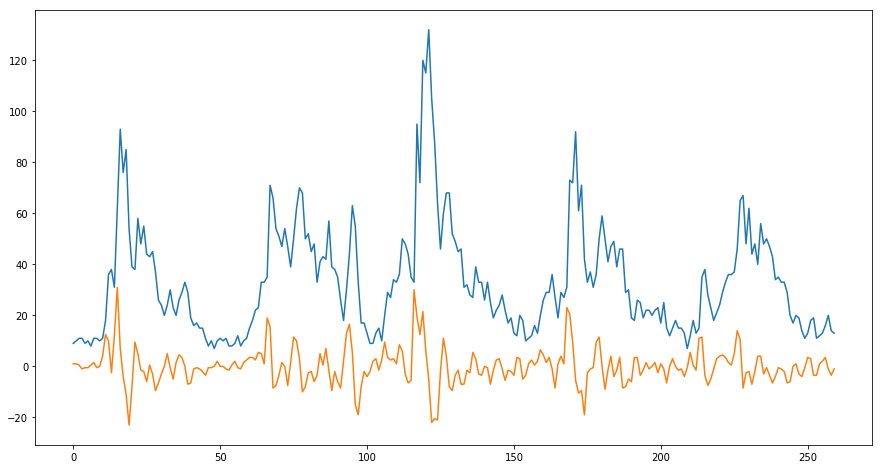

In [15]:
plt.figure(figsize=[15,8])
plt.plot(sj1)
plt.plot(np.gradient(sj1))
plt.show()

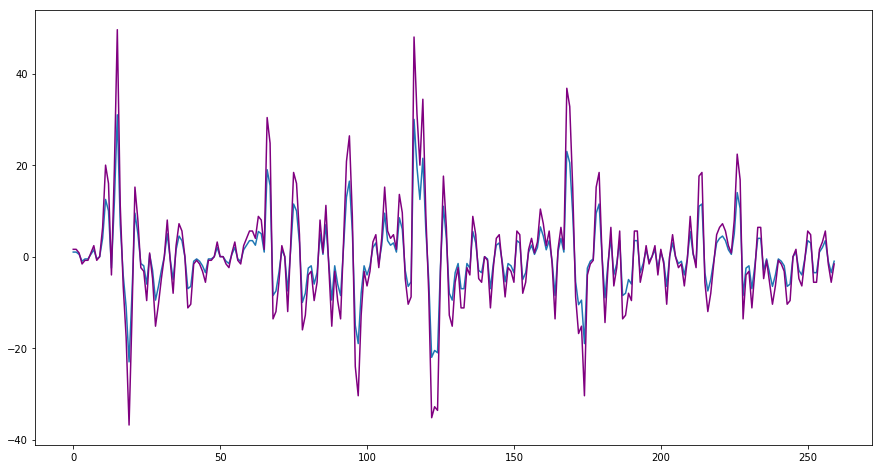

In [16]:
deriv = np.gradient(sj1)
scalar = 1.6
newderiv = scalar * deriv

plt.figure(figsize=[15,8])
plt.plot(deriv)
plt.plot(newderiv, color='purple')
plt.show()

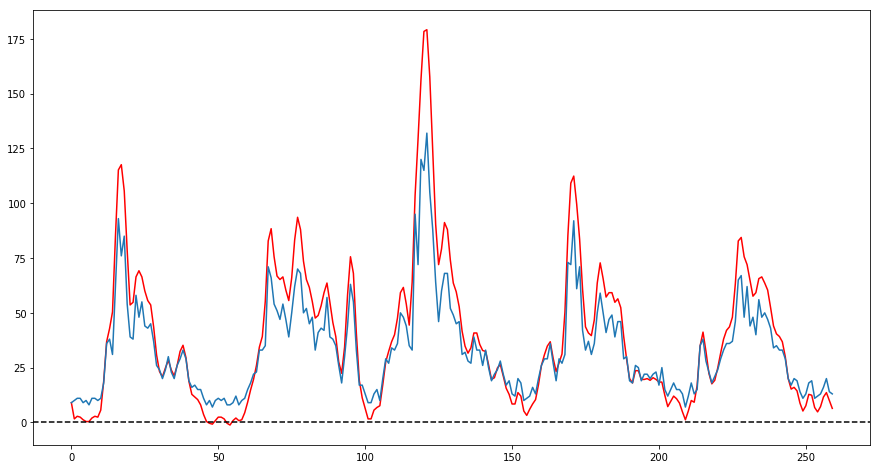

In [17]:
integral = cumtrapz(newderiv, initial=9)
plt.figure(figsize=[15,8])
plt.plot(integral, label='integral', color='red')
plt.plot(sj1)
plt.axhline(0, color='black', linestyle='--')
plt.show()

In [18]:
#alternatively, could take the max of each:

sjmaxes = [max(integral[i], sj1[i]) for i in range(len(sj1))]

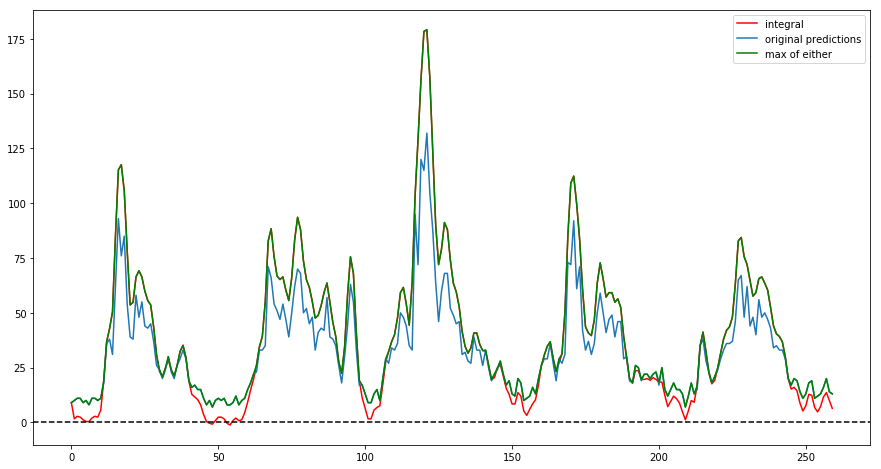

In [19]:
plt.figure(figsize=[15,8])
plt.plot(integral, label='integral', color='red')
plt.plot(sj1, label='original predictions')
plt.axhline(0, color='black', linestyle='--')
plt.plot(sjmaxes, label='max of either', color='green')
plt.legend()
plt.show()

In [36]:
def highPassFilter(a, s, mixed=None):
    deriv = np.gradient(a)
    new_deriv = deriv * s
    integral = cumtrapz(new_deriv, initial=a[0])
    length = range(len(a))
    if mixed == 'max':
        out = [max(integral[i], a[i]) for i in length]
    elif mixed == 'min':
        out = [min(integral[i], a[i]) for i in length]
    else:
        out = integral
    return out
    

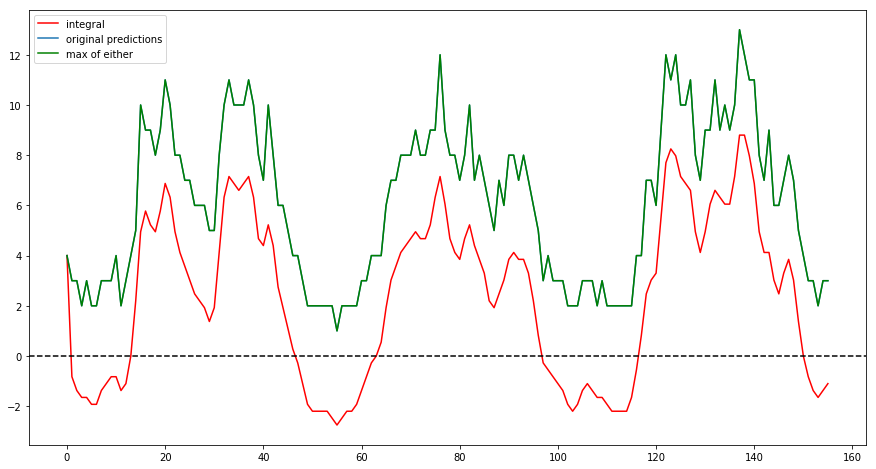

In [38]:
deriv = np.gradient(iq1)
scalar = 1.6
newderiv = scalar * deriv
integral = cumtrapz(newderiv, initial=9)
iqmaxes = [max(integral[i], iq1[i]) for i in range(len(iq1))]

plt.figure(figsize=[15,8])
plt.plot(highPassFilter(iq1,1.1), label='integral', color='red')
plt.plot(iq1, label='original predictions')
plt.axhline(0, color='black', linestyle='--')
plt.plot(highPassFilter(iq1,1.1,mixed='max'), label='max of either', color='green')
plt.legend()
plt.show()

In [10]:
#Leave Iq unchanged but submit the sj with bigger peaks, sjmaxes

In [11]:
submission = pd.read_csv('data/submission_format.csv',
                            index_col=[0, 1, 2])

In [23]:
submission.total_cases = np.concatenate([sjmaxes, iq1])
submission.total_cases = submission.total_cases.astype('int')

In [27]:
submission.to_csv("submissions/RFR_with_3wk_lag_degraded_seasonal_10pctSJgradient.csv")